<span style='font-size: 2.5em'><b>São Paulo Housing 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the median housing price in São Paulo apartments</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #1</b></span>



### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

#### Projeto de Estudo

**Aluno**: Carlos Danilo Tomé e Lucas Galdino de Camargo

**Dataset**: https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019

This data is about 13,000 apartments in São Paulo City - Brazil available in Kaggle platform.

**Final Goal**: Predict housing price in São Paulo.

---

## 🎯 Sprint Goals
- Frame the problem
- Get the data
- Data cleaning
- Simple EDA to gain insights
- Initial data preprocessing
- Train a (single) ML algorithm with all features and default hyperparameters
---

### 0. Imports, settings and read data


In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


path='./datasets/sao-paulo-properties-april-2019.csv'
housing = pd.read_csv(path)

housing.head(3)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665


## 🔲 1. Frame the Problem




### 📄 1.1. Context

**São Paulo** is the most populous city in Brazil with a population about 12.39 million in 2020 acordding IBGE [1]. 

It also the largest economy in U.S., boasting a $3.2 trillion gross state product (GSP) as of 2019. [3]. If California were a sovereign nation (2020), it would rank as the world's fifth largest economy [4].


**References:** <br/>
[1] https://cidades.ibge.gov.br/brasil/sp/sao-paulo/panorama

### 🧠 1.2. Challenge
Seu Barriga Housing is a well-established real estate company working on the housing market in São Paulo.

#### 🎯 **Objective:**
**Build a machine learning solution to automatically predict the housing prices in the _apartments_ (block groups) in São Paulo.** <br/>
These predictions will be used to determine whether it is worth investing in a given area or not.

#### **Baseline:**
Currently, the **housing prices** are estimated ***manually by experts***: a team gathers up-to-date information about a apartment and finds out the _housing price_. 
This is _costly_ and _time-consuming_, and their **estimates are not great**; they often realize that **their estimates were off by more than 20%**.

#### **Solution Planning:**
- **Regression problem**
- Metrics:
    - R²
    - Root Mean Squared Error (RMSE)
- Data sources:
    - [São Paulo Real Estate Sale](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

In [127]:
print('This dataset have', housing.shape[1],'columns and', housing.shape[0],
              'row about housing in São Paulo distributed in', len(set(housing.District)), 'districts.\n')
housing.info()

This dataset have 16 columns and 13640 row about housing in São Paulo distributed in 96 districts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  

### 1.3 Data Structure

Each row corresponds to a apartment with **15 attributes**  it's represented by **10 attributes** (9 numeric and 1 categorical). <br/>


* **Price:** Final price advertised (RS Brazilian Real). Column Type: Int64.

* **Condo:** Condominium expenses (unknown values are marked as zero). Column Type: Int64.     

* **Size:**  The property size in Square Meters m² (private areas only). Column Type: Int64. 

* **Rooms:** Number of bedrooms. Column Type: Int64.   

* **Toilets:** Number of toilets (all toilets). Column Type: Int64.     

* **Suites:** Number of bedrooms with a private bathroom (en suite). Column Type: Int64.  

* **Parking:** Number of parking spots. Column Type: Int64.       

* **Elevator:** Binary value: 1 if there is elevator in the building, 0 otherwise. Column Type: Int64. 

* **Furnished:** Binary value: 1 if the property is funished, 0 otherwise. Column Type: Int64.   

* **Swimming Pool:** Binary value: 1 if the property has swimming pool, 0 otherwise. Column Type: Int64.    

* **New:** Binary value: 1 if the property is very recent, 0 otherwise. Column Type: Int64.  

* **District:**  The neighborhood and city where the property is located, e.i: Itaim Bibi/São Paulo. 

* **Negotiation Type:**  Type of negotiation of housing. Column Type: String.
     * rent
     * sale 

* **Property Type:** Type of housing, in this feature we only have one kind of housing: 'apartment'. Column Type: String.   

* **Latitude:**  Geographic location. Column Type: Geocode.         

* **Longitude:** Geographic location. Column Type: Geocode. 

In [128]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [129]:
housing.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


## 🧹 3. Data Cleanning

### 3.1 Checking for duplicated samples

In [130]:
housing[housing.duplicated()].head(5)

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
165,1300,387,50,2,2,1,1,0,0,0,0,Cidade Tiradentes/São Paulo,rent,apartment,-23.582576,-46.417478
203,999,0,70,2,2,1,1,0,0,0,0,Ermelino Matarazzo/São Paulo,rent,apartment,-23.494694,-46.478125
204,888,0,70,2,2,1,1,0,0,0,0,Ermelino Matarazzo/São Paulo,rent,apartment,-23.494694,-46.478125
207,8000,1400,132,3,2,1,1,0,0,0,0,Iguatemi/São Paulo,rent,apartment,-23.585672,-46.681216
208,8000,1400,132,3,2,1,1,0,0,0,0,Iguatemi/São Paulo,rent,apartment,-23.585672,-46.681216


**There are 319 duplicated data**, so we will drop duplicated data keep the first sample in the dataset.

In [131]:
housing.drop_duplicates(keep='first', inplace=True)
housing.shape

(13321, 16)

we also will drop the column "Property Type" because all instances have the same value in this feature.

In [132]:
housing.drop('Property Type', axis=1, inplace=True)

### 3.2 Checking samples with missing samples     

In [133]:
housing.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Latitude            0
Longitude           0
dtype: int64

In this dataset we dont have null values

### 3.3 String Treatment     

In [134]:
# String Replace
# Let's drop '\São Paulo' of all records in dataframe
housing['District'] = housing['District'].str.partition('/', expand=True)[0]

### 3.4 Geolocation Cleanning     

São Paulo coordinates are Latitude: -23.5489, Longitude: -46.6388, so let's check how many records are distance of this point.

In [135]:
# Housing at reasonable distance of São Paulo coordinates center

min_y= -23.8
max_y= -23.2
min_x= -46.95
max_x= -46

housing[ (housing['Latitude'] < min_y )   |
         (housing['Longitude'] < min_x )  |
         (housing['Latitude']  > max_y )  |
         (housing['Longitude'] > max_x )  ].shape

(973, 15)

Ok, we have 973 records there are outliers, if we check only for coordinates latitude=longitude=0 we will see 865 records ( When they dont have the exactly coordinates they input null coordinates, let's replace in dataframe.

<ipython-input-136-441ada9ad45f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Latitude'][(housing['Latitude'] < min_y ) |
<ipython-input-136-441ada9ad45f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing['Longitude'][(housing['Latitude'] < min_y ) |
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


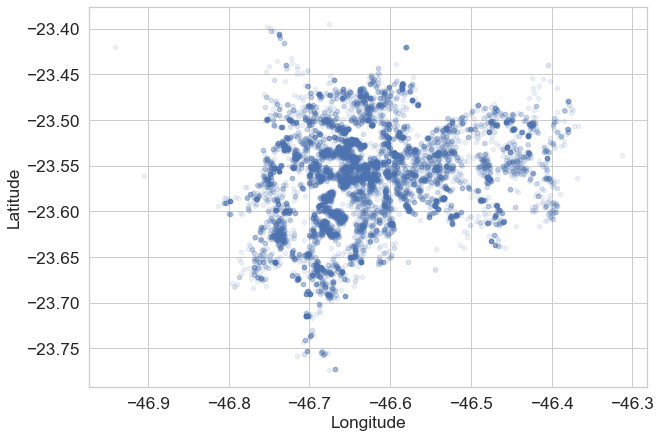

In [136]:
housing['Latitude'][(housing['Latitude'] < min_y ) |
                   (housing['Longitude'] < min_x )  |
                   (housing['Latitude']  > max_y )  |
                   (housing['Longitude'] > max_x )  
                   ]= np.nan

housing['Longitude'][(housing['Latitude'] < min_y ) |
                   (housing['Longitude'] < min_x )  |
                   (housing['Latitude']  > max_y )  |
                   (housing['Longitude'] > max_x )  
                   ]= np.nan

housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10, 7));

## 🔍 4. Exploratory Data Analysis

We next perform a _simple exploratory data analysis (EDA)_ to gain insights about the data. <br/>
A more complete EDA with hypotheses about the problem should be further elaborated. 

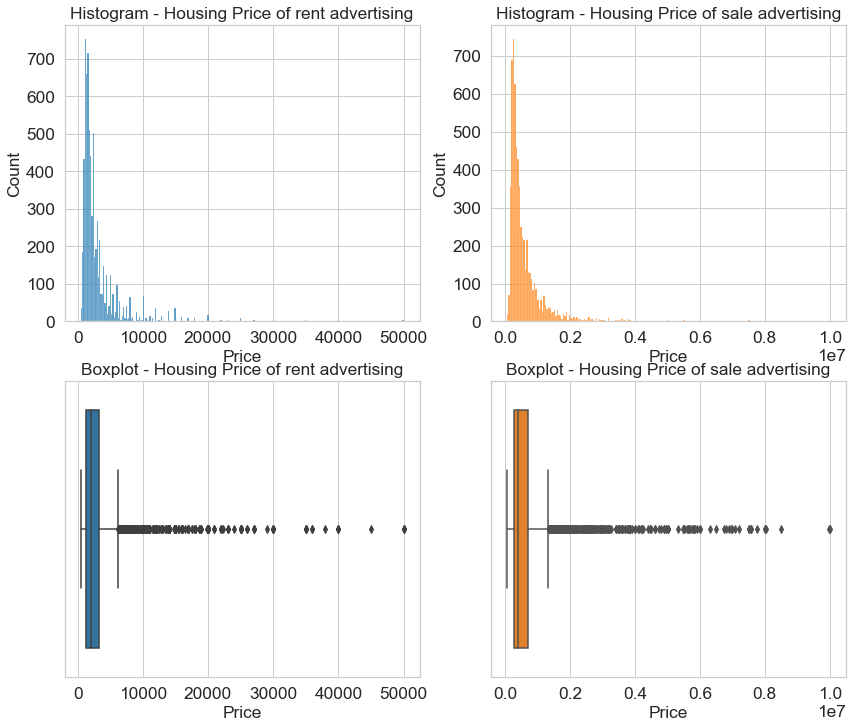

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(14,12))

sns.histplot(x="Price", data=housing[housing['Negotiation Type'] == 'rent'],  ax=axes[0, 0], color = 'tab:blue')
axes[0, 0].set_title('Histogram - Housing Price of rent advertising')

sns.histplot(x="Price", data=housing[housing['Negotiation Type'] == 'sale'],  ax=axes[0, 1], color = 'tab:orange')
axes[0, 1].set_title('Histogram - Housing Price of sale advertising')

sns.boxplot( x="Price", data=housing[housing['Negotiation Type'] == 'rent'],  ax=axes[1, 0], color = 'tab:blue')
axes[1, 0].set_title('Boxplot - Housing Price of rent advertising')

sns.boxplot( x="Price", data=housing[housing['Negotiation Type'] == 'sale'],  ax=axes[1, 1], color = 'tab:orange')
axes[1, 1].set_title('Boxplot - Housing Price of sale advertising');

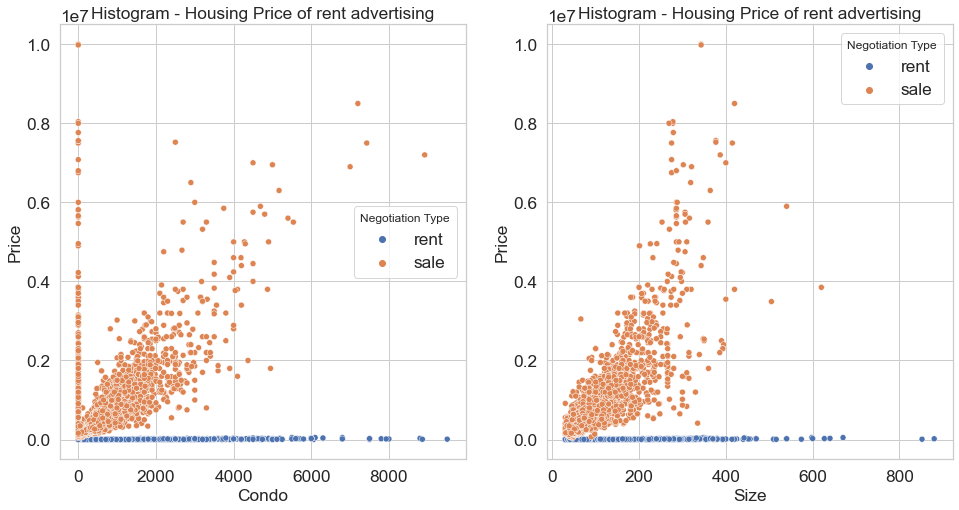

In [138]:
##### HUE de negotion type
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.scatterplot(y="Price",x='Condo', data=housing, hue ='Negotiation Type',  ax=axes[0], color = 'tab:blue')
axes[0].set_title('Histogram - Housing Price of rent advertising')

sns.scatterplot(y="Price",x='Size', data=housing,hue ='Negotiation Type',  ax=axes[1], color = 'tab:orange')
axes[1].set_title('Histogram - Housing Price of rent advertising');

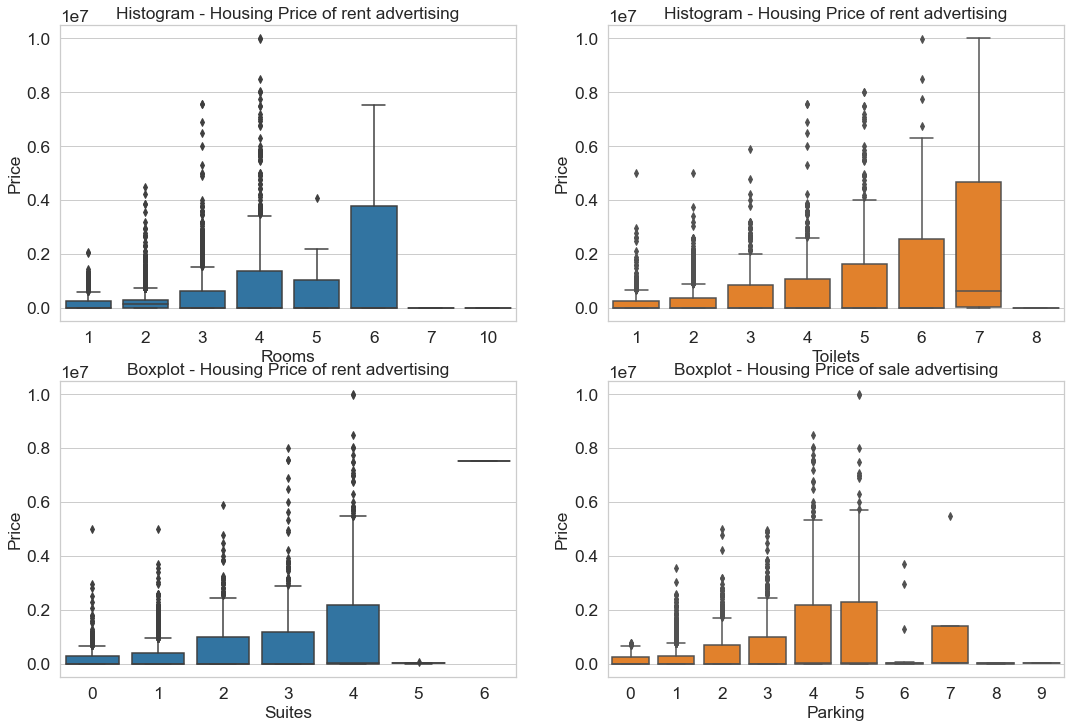

In [139]:
##### Integer Variabels

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.boxplot(y="Price",x= 'Rooms',data=housing,  ax=axes[0, 0], color = 'tab:blue')
axes[0, 0].set_title('Histogram - Housing Price of rent advertising')

sns.boxplot(y="Price",x= 'Toilets', data=housing,  ax=axes[0, 1], color = 'tab:orange')
axes[0, 1].set_title('Histogram - Housing Price of rent advertising')

sns.boxplot( y="Price",x= 'Suites',data=housing,  ax=axes[1, 0], color = 'tab:blue')
axes[1, 0].set_title('Boxplot - Housing Price of rent advertising')

sns.boxplot( y="Price",x= 'Parking', data=housing,  ax=axes[1, 1], color = 'tab:orange')
axes[1, 1].set_title('Boxplot - Housing Price of sale advertising');

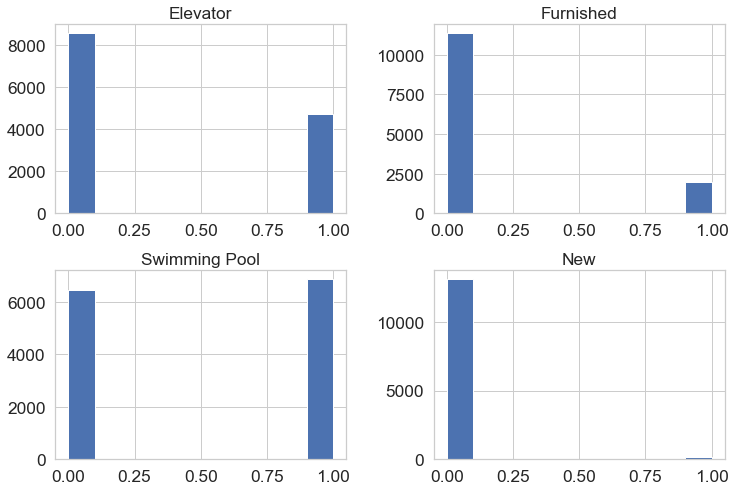

In [140]:
##### Integer variables - Count values

housing.hist(column=['Elevator', 'Furnished', 'Swimming Pool', 'New'], figsize=(12,8));

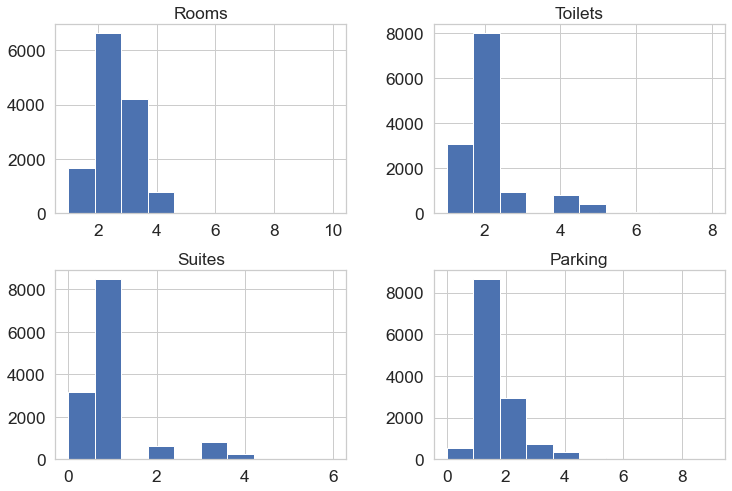

In [141]:
##### Binary variables - Count values

housing.hist(column=['Rooms', 'Toilets', 'Suites', 'Parking'], figsize=(12,8));

In [142]:
##### District Look


district = housing.groupby(['District']).apply(lambda x: pd.Series(dict(qtd_housing          = ((x.Price.count()))
                                                                   ,mean_housing_price   =  ((x.Price.mean())) 
                                                                   ,mean_housing_size    =  ((x.Size.mean()))
                                                                   ,mean_Price_per_square_meter =  ((x.Price.sum()))/((x.Size.sum()))
                                                                   ,mean_housing_condo   =  ((x.Condo.mean()))
                                                                   ,pct_new_housing      = ((x.New.sum())*100/(x.Price.count()))
))).reset_index() 

district.reset_index(drop = True, inplace=False).sort_values(['mean_Price_per_square_meter'], ascending = [False])[:25].\
                            style.background_gradient(cmap='Oranges', axis =0)

,District,qtd_housing,mean_housing_price,mean_housing_size,mean_Price_per_square_meter,mean_housing_condo,pct_new_housing
31,Iguatemi,53.000000,1388530.924528,135.320755,10261.034439,677.943396,0.000000
92,Vila Olimpia,83.000000,774797.481928,88.927711,8712.666441,914.289157,0.000000
78,Sé,89.000000,393377.550562,61.696629,6375.997450,465.011236,2.247191
9,Brooklin,248.000000,732468.479839,115.266129,6354.585566,1106.294355,0.806452
0,Alto de Pinheiros,224.000000,1067660.741071,170.258929,6270.806178,1802.678571,0.446429
73,São Domingos,34.000000,371874.735294,61.176471,6078.721635,359.764706,17.647059
25,Consolação,217.000000,443092.990783,79.313364,5586.611992,826.009217,0.921659
51,Moema,293.000000,725489.020478,131.812287,5503.955957,1568.791809,0.341297
33,Itaim Bibi,216.000000,659405.736111,126.194444,5225.315100,1772.763889,0.000000
54,Pari,83.000000,378927.819277,75.385542,5026.531724,475.602410,3.614458


<AxesSubplot:xlabel='mean_Price_per_square_meter', ylabel='Count'>

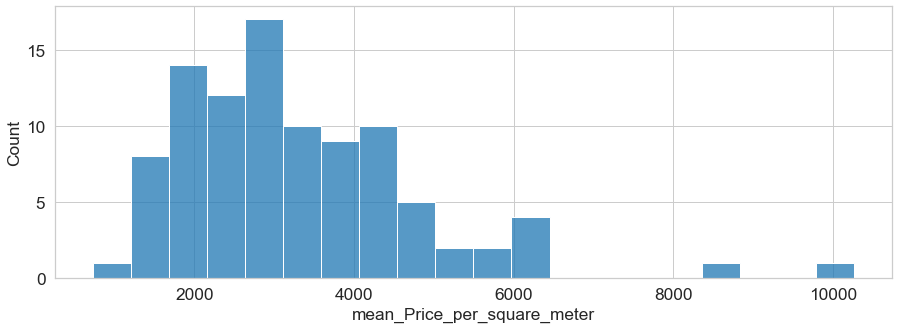

In [143]:
sns.histplot(x="mean_Price_per_square_meter", data=district, color = 'tab:blue', bins =20)


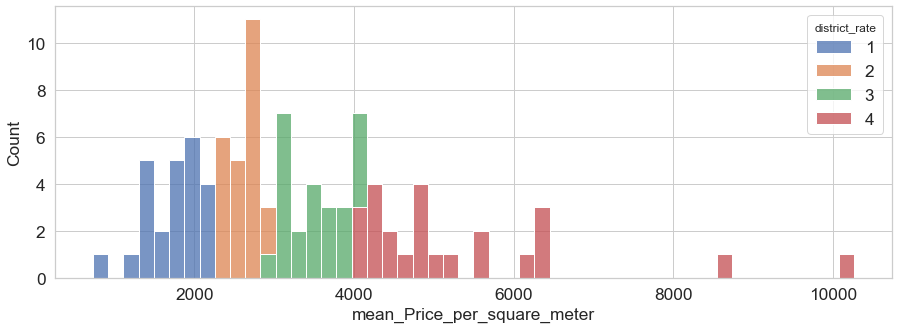

In [144]:
district['district_rate'] = pd.qcut(district['mean_Price_per_square_meter'],
                                                 q=4,
                                                 labels=[1, 2, 3, 4])

sns.histplot(x="mean_Price_per_square_meter", data=district, color = 'tab:blue', bins =50,hue="district_rate", multiple="stack");

In [145]:
district.describe()

,qtd_housing,mean_housing_price,mean_housing_size,mean_Price_per_square_meter,mean_housing_condo,pct_new_housing
count,96.000000,9.600000e+01,96.000000,96.000000,96.000000,96.000000
mean,138.760417,2.706646e+05,78.802074,3288.657337,588.539048,1.789391
std,63.609788,2.070889e+05,26.956090,1549.879882,390.730930,2.573504
min,21.000000,7.380938e+04,42.380952,728.832835,93.809524,0.000000
25%,85.000000,1.444670e+05,57.068134,2243.833638,324.857891,0.000000
50%,134.000000,1.982926e+05,71.726521,2971.615738,501.012997,0.941599
75%,188.250000,3.440826e+05,91.303728,4072.232304,716.620388,2.266789
max,293.000000,1.388531e+06,170.258929,10261.034439,2008.041475,17.647059


In [146]:
##### Correlation

# Agora vamos calcular a correlação entre nossos atributos e a nossa variável Target
housing.corr()[['Price']].sort_values(by=['Price'] ,ascending = False)[1:].style.background_gradient(cmap='Greens', axis =0)

,Price
Size,0.378664
Toilets,0.341954
Parking,0.338636
Suites,0.313027
Rooms,0.272883
Condo,0.203637
Swimming Pool,0.131839
Elevator,0.100058
New,0.029840
Furnished,-0.007296


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

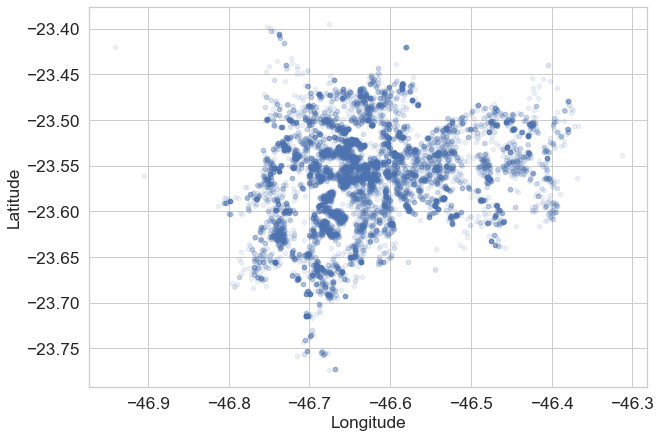

In [147]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10, 7))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

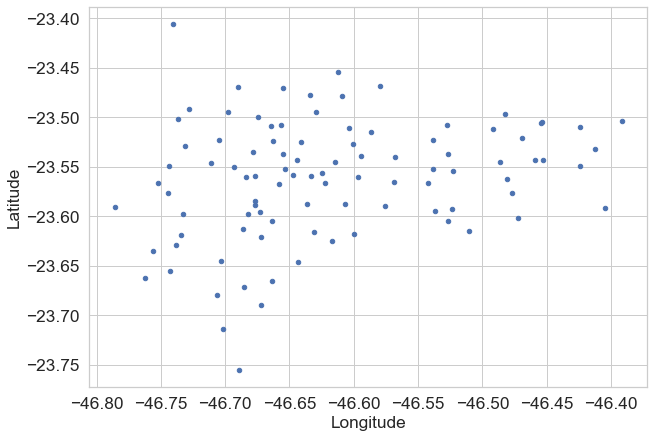

In [148]:
geo_district = housing.groupby(['District']).apply(lambda x: pd.Series(dict(Latitude   =  ((x.Latitude.mean())) 
                                                                   ,Longitude    =  ((x.Longitude.mean()))
))).reset_index() 

geo_district.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10, 7))

## ⚙️ 5. Data Processing

In [149]:
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.2, stratify=housing['Negotiation Type'], random_state=42)

In [150]:
housing_train.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Latitude,Longitude
1062,4900,830,127,3,4,3,2,1,1,1,0,Ipiranga,rent,-23.601569,-46.617087
13405,495000,540,64,3,2,1,2,0,0,0,0,Campo Grande,sale,-23.658104,-46.690502
68,1200,587,70,3,2,1,1,0,0,0,0,Cangaíba,rent,-23.508423,-46.530246
12536,195000,160,56,2,1,0,1,0,0,0,0,Artur Alvim,sale,-23.551721,-46.491767
1865,1500,142,60,1,2,1,1,0,0,0,0,Lapa,rent,-23.528334,-46.701799


#### 5.2 District

In [151]:
housing_train = pd.merge(housing_train, district[['District','district_rate']], how='left', on=['District'])

#### 5.3 Negotiation Type

In [152]:
housing_train = pd.get_dummies(data=housing_train, columns=['Negotiation Type'], drop_first=True)
housing_train.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Latitude,Longitude,district_rate,Negotiation Type_sale
0,4900,830,127,3,4,3,2,1,1,1,0,Ipiranga,-23.601569,-46.617087,2,0
1,495000,540,64,3,2,1,2,0,0,0,0,Campo Grande,-23.658104,-46.690502,1,1
2,1200,587,70,3,2,1,1,0,0,0,0,Cangaíba,-23.508423,-46.530246,3,0
3,195000,160,56,2,1,0,1,0,0,0,0,Artur Alvim,-23.551721,-46.491767,1,1
4,1500,142,60,1,2,1,1,0,0,0,0,Lapa,-23.528334,-46.701799,1,0


#### 5.3 Geolocation

In [153]:
geo_district.head()

,District,Latitude,Longitude
0,Alto de Pinheiros,-23.546528,-46.711366
1,Anhanguera,-23.595377,-46.673060
2,Aricanduva,-23.554067,-46.522486
3,Artur Alvim,-23.544653,-46.486394
4,Barra Funda,-23.523707,-46.662696


In [154]:
housing_train = pd.merge(housing_train, geo_district, how='left', on=['District'],suffixes=["", "_district"])

In [155]:
housing_train.Latitude = np.where(housing_train.Latitude.isnull()
                                  , housing_train.Latitude_district # If Latitude is null replace with Latitude_district
                                  , housing_train.Latitude # else, keep the original value
                                 )
housing_train.Longitude = np.where(housing_train.Longitude.isnull()
                                  , housing_train.Longitude_district # If Latitude is null replace with Longitude_district
                                  , housing_train.Longitude # else, keep the original value
                                 )

We replace null values with coordinates of median locantion of each district, we can improve this replace with another better techniques, but I think it is good enough.  **Let's check null values again:**

In [156]:
housing_train.isnull().sum()

Price                    0
Condo                    0
Size                     0
Rooms                    0
Toilets                  0
Suites                   0
Parking                  0
Elevator                 0
Furnished                0
Swimming Pool            0
New                      0
District                 0
Latitude                 0
Longitude                0
district_rate            0
Negotiation Type_sale    0
Latitude_district        0
Longitude_district       0
dtype: int64

Nice ! Now we need drop this temporary columns and "district".

In [157]:
housing_train.drop(columns=['District','Latitude_district','Longitude_district'], inplace=True)

#### **Separating the independent variables (features) and the _dependent variable_ (target outcome)**

In [158]:
housing_train_X = housing_train.drop(columns=['Price'])
housing_train_y = housing_train['Price'].copy()

In [159]:
housing_train.shape

(10656, 15)

## 🤖 6. ML Model

In [160]:
housing_train_X.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude,district_rate,Negotiation Type_sale
0,830,127,3,4,3,2,1,1,1,0,-23.601569,-46.617087,2,0
1,540,64,3,2,1,2,0,0,0,0,-23.658104,-46.690502,1,1
2,587,70,3,2,1,1,0,0,0,0,-23.508423,-46.530246,3,0
3,160,56,2,1,0,1,0,0,0,0,-23.551721,-46.491767,1,1
4,142,60,1,2,1,1,0,0,0,0,-23.528334,-46.701799,1,0


### 6.1 Build a Baseline Model

In [161]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # default hyperparameters

# training
lin_reg.fit(housing_train_X, housing_train_y)

LinearRegression()

### 6.3. Evaluating on the Training Set

In [162]:
y_train_pred = lin_reg.predict(housing_train_X)

### Metrics

##### **Coefficient of Determination - R²**

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=0}^{m-1}(y^{(i)}-\bar{y})^2}$$

##### **Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=0}^{m-1}(y^{(i)}-\hat{y}^{(i)})^2}{m}}$$

In [163]:
def metrics(X,y, y_pred):
    
    print(f'This model reaches:\n')

    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f'RMSE = {rmse}')
    
    r2_score = lin_reg.score(X, y)
    print(f'R2 = {r2_score}')

In [164]:
metrics(housing_train_X, housing_train_y,y_train_pred )

This model reaches:

RMSE = 436302.2156114574
R2 = 0.4791748715532662


### **Visual Analysis**

##### **Prediction vs Real**

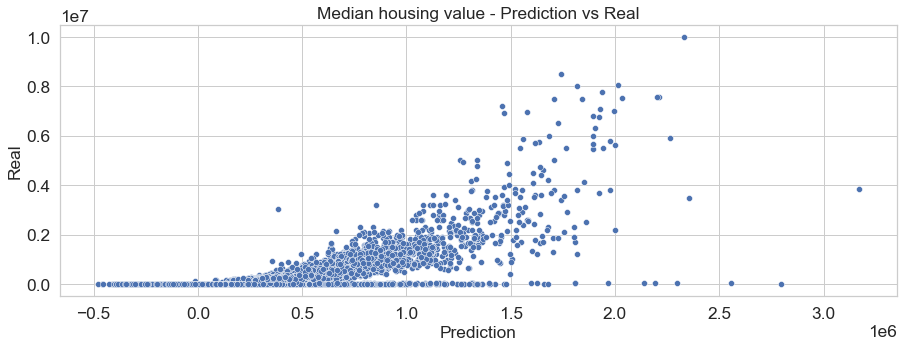

In [165]:
sns.scatterplot(x=y_train_pred, y=housing_train_y)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Median housing value - Prediction vs Real');

##### **Residual Analysis**


In [166]:
residual = housing_train_y - y_train_pred

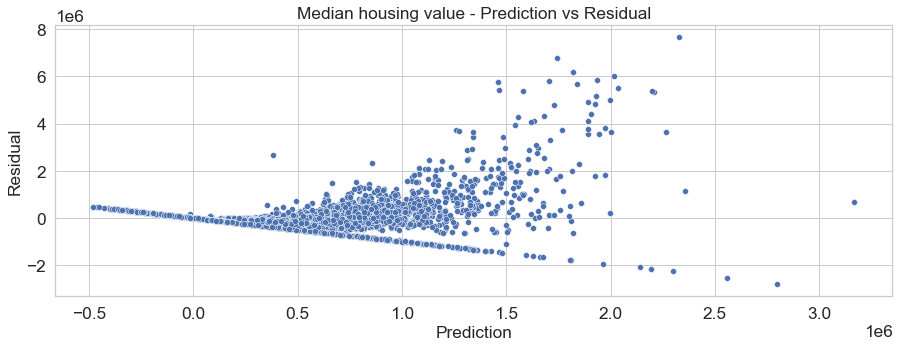

In [167]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Median housing value - Prediction vs Residual');

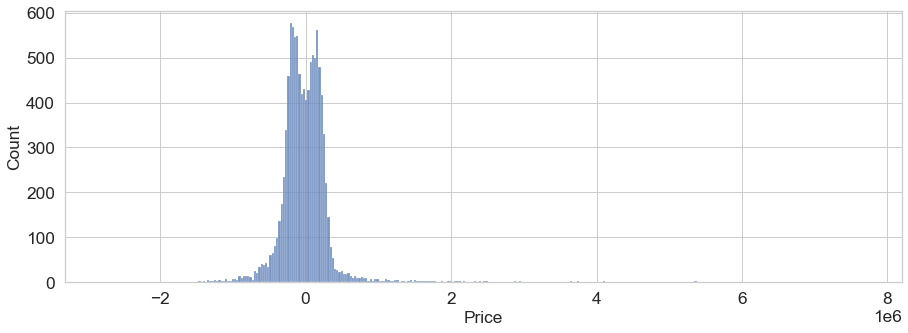

In [119]:
sns.histplot(residual);

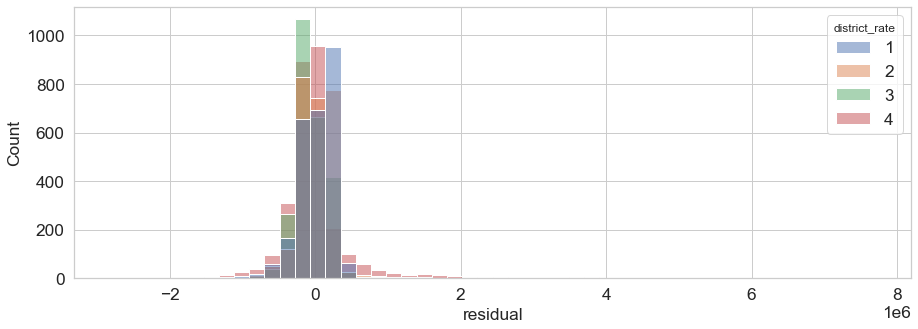

In [172]:
housing_train_X['residual'] = residual

sns.histplot(x="residual", data=housing_train_X,          
             color = 'tab:blue', bins =50,hue="district_rate");

## Sprint 2
- Choosing final sample
- Adding features
- Create a Function to imput na values
- Create a Custom Tranformer
- Build a Pipeline 
- Create a column transform
- Try other models/algorithms (mainly nonlinear)